# Dataset

In [1]:
import os, sys
from pathlib import Path

import pandas as pd
import numpy as np

In [2]:
# import utils.py
currentdir = os.path.dirname(os.path.realpath(__name__))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

from utils import *

In [3]:
config_file = "config.toml"
config = parse_config(config_file)
root_dir = Path(config['root_dir'])

### output

In [4]:
raw_fpath_file = root_dir / 'raw_fpath.csv'
raw_fpath_file

PosixPath('data/raw_fpath.csv')

## 1. Get metadata from NCBI database

In [5]:
project_accession = "PRJNA401515"
metadata_file = root_dir / f"{project_accession}.csv"
metadata_file

PosixPath('data/PRJNA401515.csv')

In [6]:
from Bio import Entrez
from io import StringIO

def get_metadata(
    project_accession,
    metadata_file,
):
    if not metadata_file.exists():
        # Set your email (required by NCBI)
        Entrez.email = "your.email@example.com"

        # Fetch the project metadata using the Entrez API
        with Entrez.esearch(db="sra", term=project_accession, retmax=5000) as handle:
            record = Entrez.read(handle)
            sra_ids = record["IdList"]

        # Fetch SRA Experiment metadata
        sra_df_list = []
        for sra_id in sra_ids:
            sra_handle = Entrez.efetch(db="sra", id=sra_id, rettype="runinfo", retmode="text")
            sra_data = sra_handle.read()
            sra_df = pd.read_csv(StringIO(sra_data.decode()))
            sra_df_list.append(sra_df)

        # Merge and save
        merged_sra_df = pd.concat(sra_df_list, axis=0).reset_index(drop=True)
        merged_sra_df.to_csv(metadata_file, index=False)
    
    return pd.read_csv(metadata_file)

In [7]:
meatadata_df = get_metadata(project_accession, metadata_file)
meatadata_df

,Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,...,Affection_Status,Analyte_Type,Histological_Type,Body_Site,CenterName,Submission,dbgap_study_accession,Consent,RunHash,ReadHash
0,SRR6046808,2017-11-14 00:01:31,2017-10-27 18:48:57,1025639,278719501,1025639,271,164,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,MODMEDMICOXFORD,SRA608812,NaN,public,A2EEC37A0104FF3F01D2C792386AE3F9,44B1C3EF17E6774A3B47DC144C600513
1,SRR6046809,2017-11-14 00:01:31,2017-10-27 18:49:08,864288,256270471,864288,296,166,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,MODMEDMICOXFORD,SRA608812,NaN,public,5BDCDA87915E6CC5DB9CB76A11D9B46E,9DD6C0A5C924813A84C9EF9ECC084A49
2,SRR6046810,2017-11-14 00:01:31,2017-10-27 18:48:17,1985059,588244858,1985059,296,390,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,MODMEDMICOXFORD,SRA608812,NaN,public,375FCB18313E34E0E4E9B64F39979B5B,BCF098218EF8C26C2A4B855B73F35A3A
3,SRR6046811,2017-11-14 00:01:31,2017-10-27 18:49:15,1355992,398893386,1355992,294,253,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,MODMEDMICOXFORD,SRA608812,NaN,public,13A1A43082FFDADB99E50DABCD5BA63C,DAAF4F57BEDBCDEA77D01564C7279720
4,SRR6046812,2017-11-14 00:01:31,2017-10-27 18:49:02,1646249,472243561,1646249,286,274,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,MODMEDMICOXFORD,SRA608812,NaN,public,A6278636979B72CC66AEEC475FEF7698,5105C06ADEF15D3ED13E345EDC52EBB2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,SRR6045018,2017-11-14 00:00:27,2017-10-27 16:12:27,788133,235186947,788133,298,153,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,MODMEDMICOXFORD,SRA608812,NaN,public,4810B976043721EDACEE190C537EAB13,8CC4FDB7CD0FEE23940FDB8CE4AB2C99
2150,SRR6045019,2017-11-14 00:00:27,2017-10-27 15:57:30,2877475,810898470,2877475,281,450,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,MODMEDMICOXFORD,SRA608812,NaN,public,32A53F045202E9D01611F9B3B5291F5D,B0E51A980E1B1AC4845A6F8EF8627DCA
2151,SRR6045020,2017-11-14 00:00:27,2017-10-27 15:59:43,1455060,421759303,1455060,289,262,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,MODMEDMICOXFORD,SRA608812,NaN,public,1E77A14300511601487F9F2B803DA4E2,443272A42A1D2B117B77732B8DE7805C
2152,SRR6045021,2017-11-14 00:00:27,2017-10-27 15:59:42,887295,250291335,887295,282,150,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,MODMEDMICOXFORD,SRA608812,NaN,public,0560F137594AFD3EF7B86422D161185F,DE24C2247D5252EA7847FA9B3FCF3471


## 2. Selecte samples

In [8]:
import plotly.express as px

In [9]:
meatadata_df['Platform'].value_counts()

ILLUMINA    2154
Name: Platform, dtype: int64

In [10]:
meatadata_df['Model'].value_counts()

Illumina MiSeq    2154
Name: Model, dtype: int64

In [11]:
meatadata_df['ScientificName'].value_counts()

Mycobacterium tuberculosis                      932
Mycobacterium avium                             267
Mycobacterium intracellulare                    187
Mycobacteroides abscessus                       163
Mycobacterium gordonae                          130
Mycobacteroides chelonae                        112
Mycobacterium intracellulare subsp. chimaera     95
Mycobacterium malmoense                          40
Mycobacterium kansasii                           33
Mycolicibacterium fortuitum                      23
Mycobacterium                                    21
Mycobacterium tuberculosis variant bovis         15
Mycobacterium tuberculosis variant africanum     15
Mycolicibacterium llatzerense                    15
Mycobacterium xenopi                             12
Mycolicibacterium peregrinum                     12
Mycolicibacterium septicum                       10
Mycobacterium porcinum                            8
Mycobacterium lentiflavum                         7
Mycobacteriu

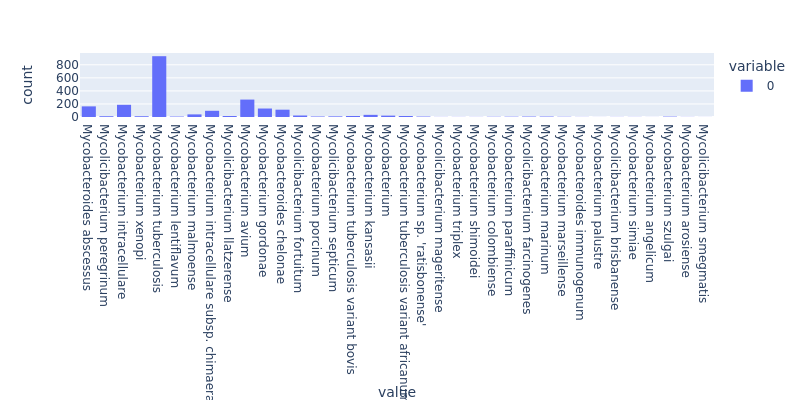

In [12]:
fig = px.histogram(
    meatadata_df['ScientificName'].values,
)
fig.update_layout(
    height=400, width=800,
)
fig.show("png")

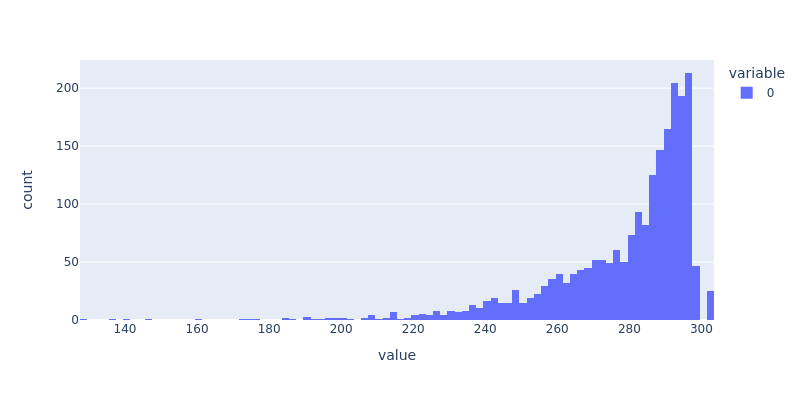

In [13]:
fig = px.histogram(
    meatadata_df['avgLength'].values,
)
fig.update_layout(
    height=400, width=800,
)
fig.show("png")

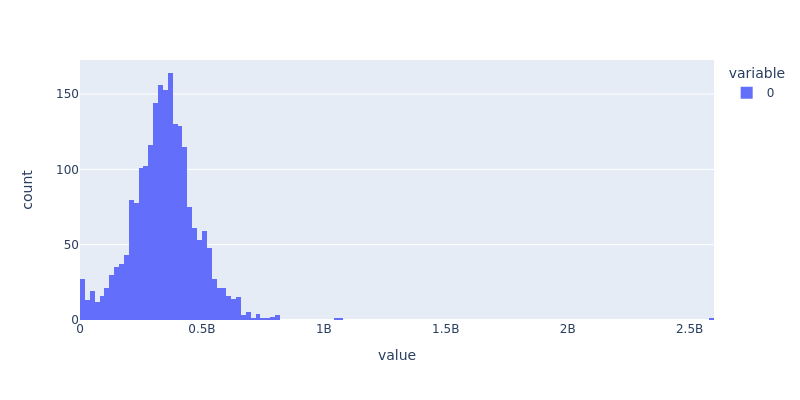

In [14]:
fig = px.histogram(
    meatadata_df['bases'].values,
)
fig.update_layout(
    height=400, width=800,
)
fig.show("png")

In [15]:
df1 = meatadata_df[meatadata_df['ScientificName'] == 'Mycobacterium tuberculosis']

df2 = df1[(df1['avgLength'] >= 250)]

desc = meatadata_df['bases'].describe()
q1 =  desc['25%']
q3 =  desc['75%']
df3 = df2[(df2['bases'] >= q1) & (df2['bases'] < q3)]

df4 = df3.sample(frac=1, random_state=0)

In [16]:
sample_size = 10

selected = df4[:sample_size]['Run'].values

In [17]:
selected

array(['SRR6046075', 'SRR6046701', 'SRR6045735', 'SRR6045327',
       'SRR6045549', 'SRR6046105', 'SRR6046861', 'SRR6044910',
       'SRR6045763', 'SRR6046306'], dtype=object)

## 3. Download raw data

In [18]:
raw_fq_dir = root_dir / "raw"
raw_fq_dir.mkdir(exist_ok=True)
raw_fq_dir

PosixPath('data/raw')

In [19]:
fastqdump_bin = root_dir / 'bin' / 'fastq-dump'
fastqdump_bin.parent.mkdir(exist_ok=True)
fastqdump_bin

PosixPath('data/bin/fastq-dump')

### Install `fastq-dump`

In [20]:
def install_sratoolkit(bin_path):
    if not bin_path.exists():
        url = "https://ftp-trace.ncbi.nlm.nih.gov/sra/sdk/3.0.2/sratoolkit.3.0.2-ubuntu64.tar.gz"
        
        sratoolkit_targz_file = bin_path.parent / 'sratoolkit.tar.gz'
        if not sratoolkit_targz_file.exists():
            cmd = f"wget -O {sratoolkit_targz_file} {url}"
            subprocs(cmd)
        
        org_bin = bin_path.parent / url.split('/')[-1].split('.tar.gz')[0] / 'bin' / 'fastq-dump'
        if not org_bin.exists():
            cmd = f"tar -xvf {sratoolkit_targz_file} -C {bin_path.parent}"
            subprocs(cmd)
            
        bin_path.symlink_to(org_bin.absolute())

In [21]:
install_sratoolkit(fastqdump_bin)

### Download with SRA accession number

In [22]:
def download(running_id):
    cmd = f"fastq-dump -O {raw_fq_dir} --gzip --split-files {running_id}"
    r1 = raw_fq_dir / f"{running_id}_1.fastq.gz"
    r2 = raw_fq_dir / f"{running_id}_2.fastq.gz"
    if not (r1.exists() & r2.exists()):
        out = subprocs(cmd)
        
    return r1, r2

In [23]:
raw_files = [
    download(running_id) for running_id in selected
]

In [24]:
fpath_df = pd.concat([
    pd.DataFrame(selected),
    pd.DataFrame(raw_files),
], axis=1)
fpath_df.columns = ['running_id', 'raw_r1', 'raw_r2']
fpath_df

,running_id,raw_r1,raw_r2
0,SRR6046075,data/raw/SRR6046075_1.fastq.gz,data/raw/SRR6046075_2.fastq.gz
1,SRR6046701,data/raw/SRR6046701_1.fastq.gz,data/raw/SRR6046701_2.fastq.gz
2,SRR6045735,data/raw/SRR6045735_1.fastq.gz,data/raw/SRR6045735_2.fastq.gz
3,SRR6045327,data/raw/SRR6045327_1.fastq.gz,data/raw/SRR6045327_2.fastq.gz
4,SRR6045549,data/raw/SRR6045549_1.fastq.gz,data/raw/SRR6045549_2.fastq.gz
5,SRR6046105,data/raw/SRR6046105_1.fastq.gz,data/raw/SRR6046105_2.fastq.gz
6,SRR6046861,data/raw/SRR6046861_1.fastq.gz,data/raw/SRR6046861_2.fastq.gz
7,SRR6044910,data/raw/SRR6044910_1.fastq.gz,data/raw/SRR6044910_2.fastq.gz
8,SRR6045763,data/raw/SRR6045763_1.fastq.gz,data/raw/SRR6045763_2.fastq.gz
9,SRR6046306,data/raw/SRR6046306_1.fastq.gz,data/raw/SRR6046306_2.fastq.gz


## 4. Save file path

In [25]:
fpath_df.to_csv(raw_fpath_file, index=False)